<a href="https://colab.research.google.com/github/bushra931/MachineLearningProjects/blob/main/multisvmclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] ="bushrakhan007"
os.environ["KAGGLE_KEY"] = "5ece31b8c7c606632ca8a7c5d82a67d5"
!kaggle datasets download pavansanagapati/images-dataset

In [ ]:
from IPython.display import clear_output
!unzip images-dataset.zip
clear_output()

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
import random

In [ ]:
# Set the path to the root folder
root_folder = "/content/data"

# List all subfolders (categories) in the root folder
categories = os.listdir(root_folder)
print(categories)
train_folder = "/content/train"
test_folder = "/content/test"

# Initialize dictionaries to hold training and testing data
train_data = {}
test_data = {}
train_ratio = 0.8

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each category
for category in categories:
  if(category == 'data'):
    continue
  else:
    category_folder = os.path.join(root_folder, category)
    print(category_folder)
    images = os.listdir(category_folder)
    print(images)

    # Split images into training and testing sets
    if len(images) >= 2:  # Ensure at least 2 images per category
        train_images, test_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)

        # Create subdirectories for the current category in train and test folders
        category_train_folder = os.path.join(train_folder, category)
        category_test_folder = os.path.join(test_folder, category)

        os.makedirs(category_train_folder, exist_ok=True)
        os.makedirs(category_test_folder, exist_ok=True)

        # Move training images to the train folder
        for image in train_images:
            src_path = os.path.join(category_folder, image)
            dest_path = os.path.join(category_train_folder, image)
            shutil.copy(src_path, dest_path)

        # Move testing images to the test folder
        for image in test_images:
            src_path = os.path.join(category_folder, image)
            dest_path = os.path.join(category_test_folder, image)
            shutil.copy(src_path, dest_path)

print("Data division complete.")


['bike', 'cars', 'dogs', 'data', 'flowers', 'human', 'horses', 'cats']
/content/data/bike
['bike_036.bmp', 'bike_131.bmp', 'bike_298.bmp', 'bike_008.bmp', 'bike_279.bmp', 'bike_135.bmp', 'bike_032.bmp', 'bike_261.bmp', 'bike_305.bmp', 'bike_031.bmp', 'bike_268.bmp', 'bike_278.bmp', 'bike_200.bmp', 'bike_093.bmp', 'bike_336.bmp', 'bike_029.bmp', 'bike_088.bmp', 'bike_069.bmp', 'bike_247.bmp', 'bike_171.bmp', 'bike_292.bmp', 'bike_296.bmp', 'bike_173.bmp', 'bike_277.bmp', 'bike_313.bmp', 'bike_262.bmp', 'bike_205.bmp', 'bike_054.bmp', 'bike_012.bmp', 'bike_178.bmp', 'bike_100.bmp', 'bike_224.bmp', 'bike_309.bmp', 'bike_107.bmp', 'bike_203.bmp', 'bike_103.bmp', 'bike_306.bmp', 'bike_134.bmp', 'bike_328.bmp', 'bike_086.bmp', 'bike_192.bmp', 'bike_181.bmp', 'bike_339.bmp', 'bike_145.bmp', 'bike_092.bmp', 'bike_266.bmp', 'bike_321.bmp', 'bike_096.bmp', 'bike_140.bmp', 'bike_289.bmp', 'bike_035.bmp', 'bike_257.bmp', 'bike_325.bmp', 'bike_364.bmp', 'bike_033.bmp', 'bike_253.bmp', 'bike_071.bmp

Found 1440 images belonging to 7 classes.
Found 363 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 73, 73, 32)        18464     
                                                                 
 activation_4 (Activation)   (None, 73, 73, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 

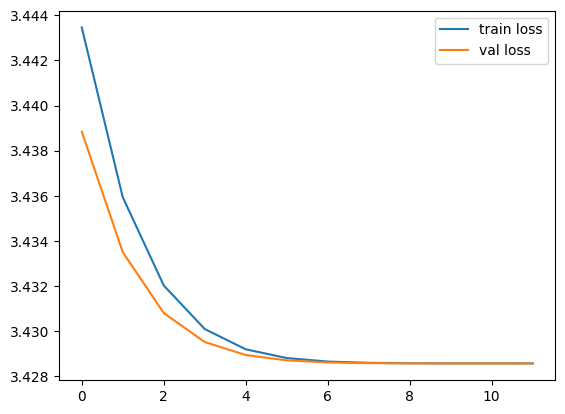

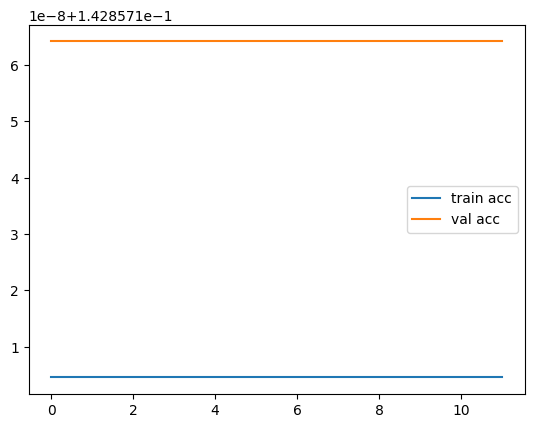

In [ ]:
# Importing Imagedatagenerator from tensorflow for data augmentation techniques.

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Preprocessing the train dataset
# Applying some data augmentation again

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
#Read the data from the dataset
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size= (300, 300),
    batch_size=32,
    class_mode='categorical'
)

# Preprocessing the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size= (300, 300),
    batch_size=32,
    class_mode='categorical'
)

# Importing Con2D and Dense, con2D is for convolutional operation and Dense is for add the nodes with respect to the hidden layers.
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Activation
from tensorflow.keras.regularizers import l2
# Initialising the CNN
from tensorflow.keras.models import Sequential
model=Sequential()

# Convolution
model.add(Conv2D(64, (3,3),strides=2,padding='same', input_shape=(300, 300, 3)))
model.add(Activation('relu'))

#Pooling
model.add(MaxPool2D(pool_size=(2,2)))

# Adding second convolutional layer
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Flattening
from tensorflow.keras.layers import Flatten
model.add(Flatten())

#Full connection
model.add(Dense(128))
model.add(Activation('relu'))

#Output layer
# Using activation function as linear, because for binary classification we use linear svm.Linear svm means we try to draw a line between the particular classes.
model.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
model.summary()

#Compiling the model

model.compile (
    loss = 'squared_hinge',
    optimizer = 'adam',
    metrics=['accuracy']
)
# Training the model on training dataset and evaluating it on the test
result=model.fit(x=train_generator, validation_data=test_generator,epochs=12)

import matplotlib.pyplot as plt
plt.plot(result.history['loss'],label='train loss')
plt.plot(result.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss_val loss')

plt.plot(result.history['accuracy'],label='train acc')
plt.plot(result.history['val_accuracy'],label='val acc')
plt.legend()
plt.savefig('accVal_acc')


# saving the model as a h5 file

model.save_weights('My_model.h5')
model.load_weights('My_model.h5')